
# Ensemble Methods and Skewed Data
For this project, we will explore two ensemble methods:
  - AdaBoost
  - Random Forests

We will also apply different KPIs (key performance indicators) that are more appropriate to highly skewed data sets. 

At the end of this project, you should know:
- How to train and use ensemble classifiers
- How to characterize model performance with ROC curves
- The difference between accuracy, true positive rate, and positive predictive value.

## Credit Card dataset
Our dataset (in `cc.csv.gz`) contains transactions made by credit cards in September 2013 by european cardholders. It contains transactions that over two days, where we have 237 frauds out of 142,167 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

The dataset contains only numerical input variables which are the result of a [PCA transformation](https://en.wikipedia.org/wiki/Principal_component_analysis). Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
- Features **V1**, **V2**, ..., **V28** are the principal components obtained with PCA.
- The only features which have not been transformed with PCA are **Time**, **Amount**, and **Class**.
  - **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. 
  - **Amount** is the transaction amount in Euros. 
  - **Class** is the response variable. If the transation was fraudulent, it equals 1. Otherwise, it equals 0.

In [1]:
# Do not import any libraries (i.e. sklearn, scipy, etc.), except for
# Python builtin libraries, unless otherwise specified.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

## Q1 

**Parition the data for cross validation**
- Load the data.
- Split the data set into $X$ (the feature dataframe, `df_X`), and $y$ (the target series `s_y`). 
- Partition the data into $k = 3$ folds using **stratified $k$-folds** (see below).

We know this is a _super_ skewed data set, so we worry about our target class being underrepresented in a random k-fold selection. With this in mind, we use a ***stratifed* $k$-fold** since it will preserve our class balance in our experiements.
- Use $k=3$. 
- Instantiate an instance of the [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) class.
   - Use a `random_state` of 23.
- Use the generator `split` to populate the test and train dictonaries:
   - `d_train_df_X`: 
      - Key: Fold number ($1$ to $k$ inclusive)
      - Value: The attribute training DataFrame for that fold
   - `d_test_df_X`: key is the fold number, value is 
      - Key: Fold number
      - Value: The attribute testing DataFrame for that fold
   - `d_train_s_y`: key is the fold number, value is 
      - Key: Fold number
      - Value: The target training Series for that fold
   - `d_train_s_y`: key is the fold number, value is 
      - Key: Fold number
      - Value: The target testing Series for that fold


<!-- BEGIN QUESTION -->



In [209]:
# This is the credit card data provided, we'll use sklearn methods to do cross validation
# to estimate error.
#
# The dataset is compressed, since it's really big (77 MB uncompressed)
df_cc = pd.read_csv('cc.csv.gz')

# Split the full dataframe into the training DataFrame and target Series.
df_X = df_cc.loc[:, df_cc.columns != 'Class']
s_y = df_cc['Class']
# Initialize a Stratified k-fold predictor, skf
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=23)

In [210]:
df_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,72222.0,1.190580,-0.188208,0.323583,-0.017402,-0.758874,-1.132340,-0.021169,-0.201165,0.364626,...,-0.000226,-0.103901,-0.442050,0.024706,0.438578,0.164461,0.930956,-0.096429,0.012989,57.00
1,65707.0,1.282559,0.270023,0.134166,0.618716,-0.291346,-0.893310,0.005146,-0.119655,0.219620,...,-0.139638,-0.324119,-0.983490,0.098567,-0.044337,0.228126,0.120401,-0.030385,0.024717,0.89
2,47048.0,-0.777343,0.081844,1.910231,1.194221,1.018604,0.438980,0.183102,0.017511,-0.193956,...,0.408923,0.072843,0.361164,-0.159239,-0.743651,0.092543,-0.165719,-0.022370,-0.093903,40.00
3,127379.0,-0.887548,1.417217,0.753405,2.257167,1.392043,0.680374,0.531104,0.609270,-1.725432,...,-0.220606,-0.345603,-1.323231,0.219222,-0.080944,-0.791587,-0.773272,0.040113,0.099547,9.08
4,151137.0,1.819262,-0.445540,-0.186929,1.268411,-0.483948,0.164878,-0.572012,0.022557,1.071776,...,0.010713,0.065024,0.222817,0.099592,-0.728832,-0.236169,-0.722497,0.068185,-0.010816,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142399,65324.0,-0.559946,0.103121,0.319922,-0.973168,1.226528,-1.277010,1.106265,-0.394966,-0.566084,...,0.401564,0.160310,0.518538,0.152764,0.102517,-0.821350,0.710368,0.148434,0.049325,57.81
142400,135695.0,1.833353,-0.450252,-0.469224,0.831620,0.415326,2.161855,-1.088867,0.775843,0.984546,...,-0.349295,0.037067,0.266594,0.349396,-1.025944,-0.514426,-0.739087,0.106196,-0.045159,1.00
142401,62620.0,-3.324328,-2.771390,1.883730,0.154892,0.142827,-1.327852,-1.089896,0.762312,-1.578990,...,0.561959,0.165352,-0.626969,0.314974,0.442229,0.227412,-0.591151,-0.054984,-0.393804,205.77
142402,39607.0,-2.457284,-6.208370,-1.997703,1.251932,-2.132900,0.456995,2.335032,-0.384962,-0.115378,...,3.750285,0.974168,-1.585880,-1.585928,-0.181570,-0.622555,0.678623,-0.442699,0.318217,1915.01


In [211]:
d_train_df_X = {}
d_test_df_X = {}
d_train_s_y = {}
d_test_s_y = {}


# Construct the above dictionaries.
for i, (train_index, test_index) in enumerate(skf.split(df_X,s_y)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    
    d_train_df_X[i+1] = pd.DataFrame(df_X.values[train_index])
    d_test_df_X[i+1] = pd.DataFrame(df_X.values[test_index])
    d_train_s_y[i+1] = pd.Series(s_y.values[train_index])
    d_test_s_y[i+1] = pd.Series(s_y.values[test_index])

In [212]:
# Look at the test data and verify that the target training datasets are as
# equally distributed as possible.
for key in d_test_s_y.keys():
    print(f'Fold {key}:')
    print(d_test_s_y[key].value_counts())
    print()

Fold 1:
0    47389
1       79
dtype: int64

Fold 2:
0    47389
1       79
dtype: int64

Fold 3:
0    47389
1       79
dtype: int64



<!-- END QUESTION -->

## Q2
**Write functions to compute performance metrics**

For this problem, we will write four functions to test the performance of a classifier.
- Each function will take in:
    - `y_pred`, a Pandas Series of prediciton target classes
    - `y_label` a Pandas Series of true target labels.
- Each function should return a `float`ing point number between 0.0 and 1.0

You'll write the following four functions:
- `tpr(y_pred, y_label)`: Computes the **true positive rate**
- `fpr(y_pred, y_label)`: Computes the **false positive rate**
- `ppv(y_pred, y_label)`: Computes the **positive predictive value**.
- `accuracy(y_pred, y_label)`: Computes the **accuracy**


<!-- BEGIN QUESTION -->



In [213]:
# Write some helper functions to compute TPR, FPR, PPV, and accuracy.
def tpr(y_pred: pd.Series, y_label : pd.Series) -> float:
    """Compute the true postive rate.

    Note: It should be between 0 and 1 (i.e. *not* a percentage)
    """
    #print('y_pred', y_pred)
    #print('t_label', y_label)
    tp = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 1:
            tp +=1
    tn = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 0:
            tn +=1
    fp = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 1:
            fp +=1
    
    fn = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 0:
            fn +=1
    #print('tp', tp)
    #print('tn', tn)
    #print('fp', fp)
    #print('fn', fn)
    tpr_ = tp / (tp+fn)
    
    return tpr_


def fpr(y_pred: pd.Series, y_label : pd.Series) -> float:
    """Compute the false postive rate.

    Note: It should be between 0 and 1 (i.e. *not* a percentage)
    """
    tp = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 1:
            tp +=1
    tn = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 0:
            tn +=1
    fp = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 1:
            fp +=1
    
    fn = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 0:
            fn +=1
    
    fpr_ = fp/ (fp+tn)
    return fpr_


def ppv(y_pred: pd.Series, y_label : pd.Series) -> float:
    """Compute the positive predictive value.

    Note: It should be between 0 and 1 (i.e. *not* a percentage)
    """
    tp = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 1:
            tp +=1
    tn = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 0:
            tn +=1
    fp = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 1:
            fp +=1
    
    fn = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 0:
            fn +=1
    
    ppv_ = tp/(tp+fp)
    
    return ppv_


def accuracy(y_pred: pd.Series, y_label : pd.Series) -> float:
    """Compute the accuracy.

    Note: It should be between 0 and 1 (i.e. *not* a percentage)
    """
    tp = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 1:
            tp +=1
    tn = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 0:
            tn +=1
    fp = 0
    for t, p in zip(y_label, y_pred):
        if t == 0 and p == 1:
            fp +=1
    
    fn = 0
    for t, p in zip(y_label, y_pred):
        if t == 1 and p == 0:
            fn +=1
    
    accuracy_ = (tp+tn)/(tp+fp+fn+tn)
    return accuracy_

In [214]:
# You can write some tests for your functions here, if you wish.
tpr_test = tpr(d_test_s_y[1], d_test_s_y[2])
tpr_test

0.0

<!-- END QUESTION -->

## Q3 

**Test the Performance of AdaBoost**


When we talked about AdaBoost in class, we used a collection of "Decision Stumps". In this project, we will use the implementation of [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) in scikit-learn.  
- As you browse the documentation, you will notice that the default base esimator for `AdaBoostClassifier` is a `DecisionTreeClassifier(max_depth=1)` (i.e. exactly what we learned, the decision stump).
- After you fit an `AdaBoost` model, you can call these methods:
     - `predict`, which yields a class prediction
     - `predict_proba`, which yieldst the probability of being in the class `0` or the class `1`. (These probabilities are used when creating ROC curves.)

For this problem, we will do the following:
- Loop over the $k$ folds using the dictionaries from Q1.
- For each fold:
    1. Fit an `AdaBoostClassifier` on the fold's training set.
        - Make sure that `n_estimators=25`, and `random_state=23`.
    2. Get the `AdaBoostClassifier`'s predictions on the fold's testing set.
    3. Compute the ROC curve, and ROC area under curve (AUC) of the classifier on the fold's testing set.
    3. Compute the accuracy, TPR, PPV, and FPR of the classifier on the fold's testing set.
- **For the third fold only**, save the class predictions into a variable called `y_hat_ab` for use in Q5.
- Plot the ROC curves for each fold on one graph.

*Hints*:
- For plotting the ROC curve, the following functions should be useful:
    - [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) computes an array of points which you can use to plot your curve. It returns `fpr` and `tpr`, which represent points on the curve, and `thresholds`, which you will not need.
    - [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) computes the AUC of an ROC curve.
    - You should avoid using `plot_roc_curve`, as it is deprecated. 
    - Likewise, you should avoid [`ROCCurveDisplay`](https://scikit-learn.org/0.24/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay), since it only lets us visualize one fold at a time. However, its related [tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html) may be helpful.

*Note*: This can take a few minutes to run.
- To make debugging faster, you can set `n_estimators=1` or some small number. However, when obtaining the final results, please make sure that `n_estimators=25`.


<!-- BEGIN QUESTION -->



In [215]:
fpr_curves_ab = {} # Contains the fpr curve points generated by roc_curve on each fold.
tpr_curves_ab = {} # Contains the tpr curve points generated by roc_curve on each fold.

aucs_ab = {} # Contains the AUC value generated by roc_auc_score on each fold.
tprs_ab = {} # Contains the TPR you compute on each fold.
fprs_ab = {} # Contains the FPR you compute on each fold.
ppvs_ab = {} # Contains the PPV you compute on each fold.
accs_ab = {} # Contains the accuracy you compute on each fold.

for k in d_train_df_X.keys():
    print(f'Fold {k}', end='')
    
    # Create an AdaBoost classifier and fit it to the dataset.
    clf_ab = AdaBoostClassifier(n_estimators=25, random_state=23)
    clf_ab.fit(d_train_df_X[k], d_train_s_y[k])

    # Compute the predicitons (both class and probability) on the test set.
    y_pred = clf_ab.predict(d_test_df_X[k])
    y_pred_prob = clf_ab.predict_proba(d_test_df_X[k])

    # Compute the ROC curve and AUC score. Hint: use roc_curve / roc_auc_score.
    #print(y_pred_prob.T[0])
    fpr_curves, tpr_curves, thresholds = roc_curve(d_test_s_y[k],y_pred_prob[:, 1])
    fpr_curves_ab[k] = fpr_curves
    tpr_curves_ab[k] = tpr_curves
    aucs_ab[k] = roc_auc_score(d_test_s_y[k], y_pred_prob[:, 1])

    # Compute the raw TPR, PPV, FPR, and accuracy. Do not use any library functions.
    tprs_ab[k] = tpr(y_pred, d_test_s_y[k])
    fprs_ab[k] = fpr(y_pred, d_test_s_y[k])
    ppvs_ab[k] = ppv(y_pred, d_test_s_y[k])
    accs_ab[k] = accuracy(y_pred, d_test_s_y[k])

    print(f' TPR: {tprs_ab[k]:.3f} FPR: {fprs_ab[k]:.3f} PPV: {ppvs_ab[k]:.3f} Accuracy: {accs_ab[k]:.3f} AUC: {aucs_ab[k]:.3f}')

    # Save the third fold's predicitons
    if k == 3:
        y_hat_ab = y_pred

Fold 1 TPR: 0.620 FPR: 0.000 PPV: 0.817 Accuracy: 0.999 AUC: 0.966
Fold 2 TPR: 0.620 FPR: 0.000 PPV: 0.754 Accuracy: 0.999 AUC: 0.963
Fold 3 TPR: 0.709 FPR: 0.000 PPV: 0.800 Accuracy: 0.999 AUC: 0.958


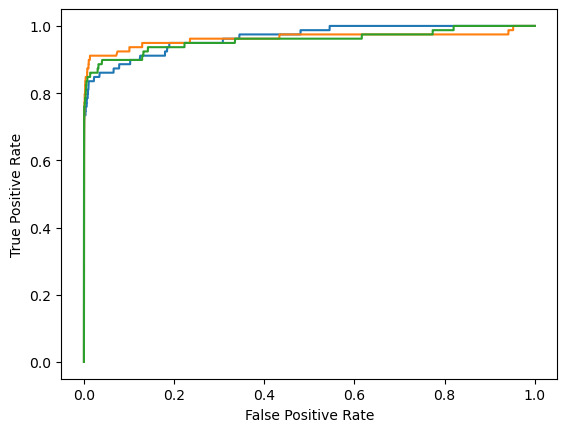

In [216]:
# Plot ROC curve
for k in d_train_df_X.keys():
    plt.plot(fpr_curves_ab[k],tpr_curves_ab[k])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

In [217]:
# Print min, mean, max metrics.
print(f'TPR min: {min(tprs_ab.values()):.3f} mean: {np.average(list(tprs_ab.values())):.3f} max: {max(tprs_ab.values()):.3f}')
print(f'FPR min: {min(fprs_ab.values()):.3f} mean: {np.average(list(fprs_ab.values())):.3f} max: {max(fprs_ab.values()):.3f}')
print(f'PPV min: {min(ppvs_ab.values()):.3f} mean: {np.average(list(ppvs_ab.values())):.3f} max: {max(ppvs_ab.values()):.3f}')
print(f'ACC min: {min(accs_ab.values()):.3f} mean: {np.average(list(accs_ab.values())):.3f} max: {max(accs_ab.values()):.3f}')
print(f'AUC min: {min(aucs_ab.values()):.3f} mean: {np.average(list(aucs_ab.values())):.3f} max: {max(aucs_ab.values()):.3f}')

TPR min: 0.620 mean: 0.650 max: 0.709
FPR min: 0.000 mean: 0.000 max: 0.000
PPV min: 0.754 mean: 0.790 max: 0.817
ACC min: 0.999 mean: 0.999 max: 0.999
AUC min: 0.958 mean: 0.962 max: 0.966


<!-- END QUESTION -->

## Q4 

**Test the Performance of Random Forests**

Now, let's try another ensemble method: Random Forests, again using the scikit-learn implementation, which for this case is [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
- Following our book, we will build complete trees, with no pruning. That means that:
    - Every leaf in the tree will be completelely pure.
    - If you exam an individual decision tree, it would be overtrained to our training set.  
- To avoid this, while building the decision trees, at every internal node, we select $p$ attributes at random, and then find the best split that minimizes impurtity.  
    - The value $p$ is a hyperparameter of the Random Forest, corresponding to the `max_features` parameter for the `RandomForestClassifier`.

As in Q3, we will do the following for this problem:
- Loop over the $k$ folds using the dictionaries from Q1.
- For each fold:
    1. Fit an `RandomForestClassifier` on the fold's training set.
        - Make sure that `criterion="entropy"`, `max_features="sqrt"`, and `random_state=23`.
    2. Get the `RandomForestClassifier`'s predictions on the fold's testing set.
    3. Compute the ROC curve, and ROC area under curve (AUC) of the classifier on the fold's testing set.
    3. Compute the accuracy, TPR, PPV, and FPR of the classifier on the fold's testing set.
- **For the third fold only**, save the class predictions into a variable called `y_hat_rf` for use in Q5.
- Plot the ROC curves for each fold on one graph.


*Note*: This can take a few minutes to run.
- To make debugging faster, you can set (((`n_estimators=1` or some small number. However, when obtaining the final results, please make sure that `n_estimators=25`.)))

<!-- BEGIN QUESTION -->



In [218]:
fpr_curves_rf = {} # Contains the fpr curve points generated by roc_curve on each fold.
tpr_curves_rf = {} # Contains the tpr curve points generated by roc_curve on each fold.

aucs_rf = {} # Contains the AUC value generated by roc_auc_score on each fold.
tprs_rf = {} # Contains the TPR you compute on each fold.
fprs_rf = {} # Contains the FPR you compute on each fold.
ppvs_rf = {} # Contains the PPV you compute on each fold.
accs_rf = {} # Contains the accuracy you compute on each fold.

for k in d_train_df_X.keys():
    print(f'Fold {k}', end='')
    
    # Create an AdaBoost classifier and fit it to the dataset.
    clf_rf = RandomForestClassifier(n_estimators=25,criterion="entropy", max_features="sqrt",random_state=23)
    clf_rf.fit(d_train_df_X[k], d_train_s_y[k])
    # Compute the predicitons (both class and probability) on the test set.
    y_pred = clf_rf.predict(d_test_df_X[k])
    y_pred_prob = clf_rf.predict_proba(d_test_df_X[k])

    # Compute the ROC curve and AUC score. Hint: use roc_curve / roc_auc_score.
    fpr_curves, tpr_curves, thresholds = roc_curve(d_test_s_y[k],y_pred_prob[:, 1])
    fpr_curves_rf[k] = fpr_curves
    tpr_curves_rf[k] = tpr_curves
    aucs_rf[k] = roc_auc_score(d_test_s_y[k], y_pred_prob[:, 1])

    # Compute the raw TPR, PPV, FPR, and accuracy. Do not use any library functions.
    tprs_rf[k] = tpr(y_pred, d_test_s_y[k])
    fprs_rf[k] = fpr(y_pred, d_test_s_y[k])
    ppvs_rf[k] = ppv(y_pred, d_test_s_y[k])
    accs_rf[k] = accuracy(y_pred, d_test_s_y[k])

    print(f' TPR: {tprs_rf[k]:.3f} FPR: {fprs_rf[k]:.3f} PPV: {ppvs_rf[k]:.3f} Accuracy: {accs_rf[k]:.3f} AUC: {aucs_rf[k]:.3f}')

    # Save the third fold's predicitons
    if k == 3:
        y_hat_rf = y_pred

Fold 1 TPR: 0.747 FPR: 0.000 PPV: 0.922 Accuracy: 0.999 AUC: 0.911
Fold 2 TPR: 0.797 FPR: 0.000 PPV: 0.913 Accuracy: 1.000 AUC: 0.949
Fold 3 TPR: 0.772 FPR: 0.000 PPV: 0.968 Accuracy: 1.000 AUC: 0.930


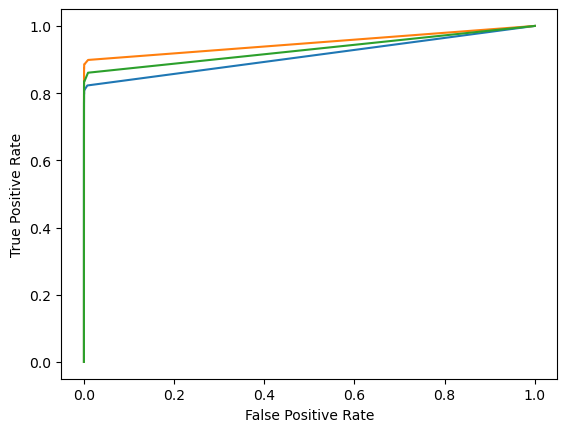

In [219]:
# Plot ROC curve
for k in d_train_df_X.keys():
    plt.plot(fpr_curves_rf[k],tpr_curves_rf[k])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

In [220]:
# Print min, mean, max metrics.
print(f'TPR min: {min(tprs_rf.values()):.3f} mean: {np.average(list(tprs_rf.values())):.3f} max: {max(tprs_rf.values()):.3f}')
print(f'FPR min: {min(fprs_rf.values()):.3f} mean: {np.average(list(fprs_rf.values())):.3f} max: {max(fprs_rf.values()):.3f}')
print(f'PPV min: {min(ppvs_rf.values()):.3f} mean: {np.average(list(ppvs_rf.values())):.3f} max: {max(ppvs_rf.values()):.3f}')
print(f'ACC min: {min(accs_rf.values()):.3f} mean: {np.average(list(accs_rf.values())):.3f} max: {max(accs_rf.values()):.3f}')
print(f'AUC min: {min(aucs_rf.values()):.3f} mean: {np.average(list(aucs_rf.values())):.3f} max: {max(aucs_rf.values()):.3f}')

TPR min: 0.747 mean: 0.772 max: 0.797
FPR min: 0.000 mean: 0.000 max: 0.000
PPV min: 0.913 mean: 0.934 max: 0.968
ACC min: 0.999 mean: 1.000 max: 1.000
AUC min: 0.911 mean: 0.930 max: 0.949


<!-- END QUESTION -->

## Q5

**Calculate the Cost of Fraud**

- Recall that in Q3 and Q4, we saved the predictions of the testing set of fold #3 into the variables `y_hat_ab` and `y_hat_rf` for the AdaBoost and RandomForest models respectively.
- We want to use these predictions to perform a cost analysis.
    - Specifically, Mr. Bank Man wants to know how much money he is going to save if he deploys either of these fraud algorithms to his bank's real-time payment processing system.
    - Assume that there is not a currently deployed fraud detection algorithm.
- Our cost analysis model is defined as follows:
    - For every fraudulent transaction that is not predicted as fraudulent, the bank loses **twice the transaction amount**.  
        - *Example*: If a fradulent charge for €10 goes undectected, it costs the bank €20.  
    - For every non-fradulent transaction that is predicted as fradulent, the bank loses a **flat fee of €3** due to costs from customer service support and re-marking the transaction.

Using the 3rd fold test sample, calculate how much money Mr. Bank Man will save with each algorithm. Write a recommendation of which algorithm to deploy to production.


Without a fraud detecting algorithm, the fraudulent cases will cost the bank 11242.37 euros. With the Adaboost classifier, it will save the bank 2704.05 euros. The random forest classifier saves the bank 6879.99 euros. Since the random forest classifer save around 3 times the amount of the Adaboost classifier, Mr. Bank Man should implement a random forest classifier over an Adaboost classifier. 

<!-- BEGIN QUESTION -->



In [226]:
# First, calculate the current cost to the bank with no fraud detection
d_test = d_test_df_X[3].copy()
d_test['Actual'] = d_test_s_y[3]
d_test['Pred'] = y_hat_ab
d_test = d_test.rename(columns={29: 'Amount'})
idxs = d_test.index[d_test['Actual']==1].tolist()
cost = d_test.iloc[idxs]["Amount"]

current_cost = sum(cost)
print(f'The current cost to the bank is €{current_cost:.2f}')

The current cost to the bank is €11242.37


In [227]:
# Finally, compute the costs/savings to the bank if we deploy the AdaBoost classifier
idxs_ab_nPred = d_test.index[(d_test['Actual']==1) & (d_test['Pred'] == 0)].tolist()
cost_ab_nPred = d_test.iloc[idxs_ab_nPred]["Amount"]

idxs_ab_nFraud = d_test.index[(d_test['Actual']==0) & (d_test['Pred'] == 1)].tolist()
#cost_ab_nFraud = d_test.iloc[idxs_ab]["Amount"]

cost_ab_undetected_fraud = sum(cost_ab_nPred*2)
cost_ab_false_fraud = len(idxs_ab_nFraud) * 3
savings_ab = current_cost - (cost_ab_undetected_fraud + cost_ab_false_fraud)
#if(savings_ab > 0):
#    savings_ab = cost_ab_undetected_fraud + cost_ab_false_fraud

print('With the AdaBoost classifier, the bank\'s costs will be:')
print(f'  Undetected fraud: €{cost_ab_undetected_fraud:.2f}')
print(f'  False fraud: €{cost_ab_false_fraud:.2f}')
print()
print(f'The bank will save €{savings_ab:.2f} by deploying the AdaBoost algorithm.')

With the AdaBoost classifier, the bank's costs will be:
  Undetected fraud: €8496.32
  False fraud: €42.00

The bank will save €2704.05 by deploying the AdaBoost algorithm.


In [228]:
# Finally, compute the costs/savings to the bank if we deploy the RandomForest classifier
d_test = d_test_df_X[3].copy()
d_test['Actual'] = d_test_s_y[3]
d_test['Pred'] = y_hat_rf
d_test = d_test.rename(columns={29: 'Amount'})

idxs_rf_nPred = d_test.index[(d_test['Actual']==1) & (d_test['Pred'] == 0)].tolist()
cost_rf_nPred = d_test.iloc[idxs_rf_nPred]["Amount"]

idxs_rf_nFraud = d_test.index[(d_test['Actual']==0) & (d_test['Pred'] == 1)].tolist()

cost_rf_undetected_fraud = sum(cost_rf_nPred*2)
cost_rf_false_fraud = len(idxs_rf_nFraud)*3
savings_rf = current_cost - (cost_rf_undetected_fraud + cost_rf_false_fraud)
#if(savings_rf > 0):
#    savings_rf = cost_rf_undetected_fraud + cost_rf_false_fraud

print('With the RandomForest classifier, the bank\'s costs will be:')
print(f'  Undetected fraud: €{cost_rf_undetected_fraud:.2f}')
print(f'  False fraud: €{cost_rf_false_fraud:.2f}')
print()
print(f'The bank will save €{savings_rf:.2f} by deploying the AdaBoost algorithm.')

With the RandomForest classifier, the bank's costs will be:
  Undetected fraud: €4356.38
  False fraud: €6.00

The bank will save €6879.99 by deploying the AdaBoost algorithm.


<!-- END QUESTION -->

